Decision Tree Classification (Iris Dataset)

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import joblib

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)


In [9]:
model_clf = DecisionTreeClassifier(
    criterion='gini',     # impurity measure
    max_depth=4,          # prevent overfitting
    random_state=42
)


In [10]:
model_clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
y_pred = model_clf.predict(X_test)



In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



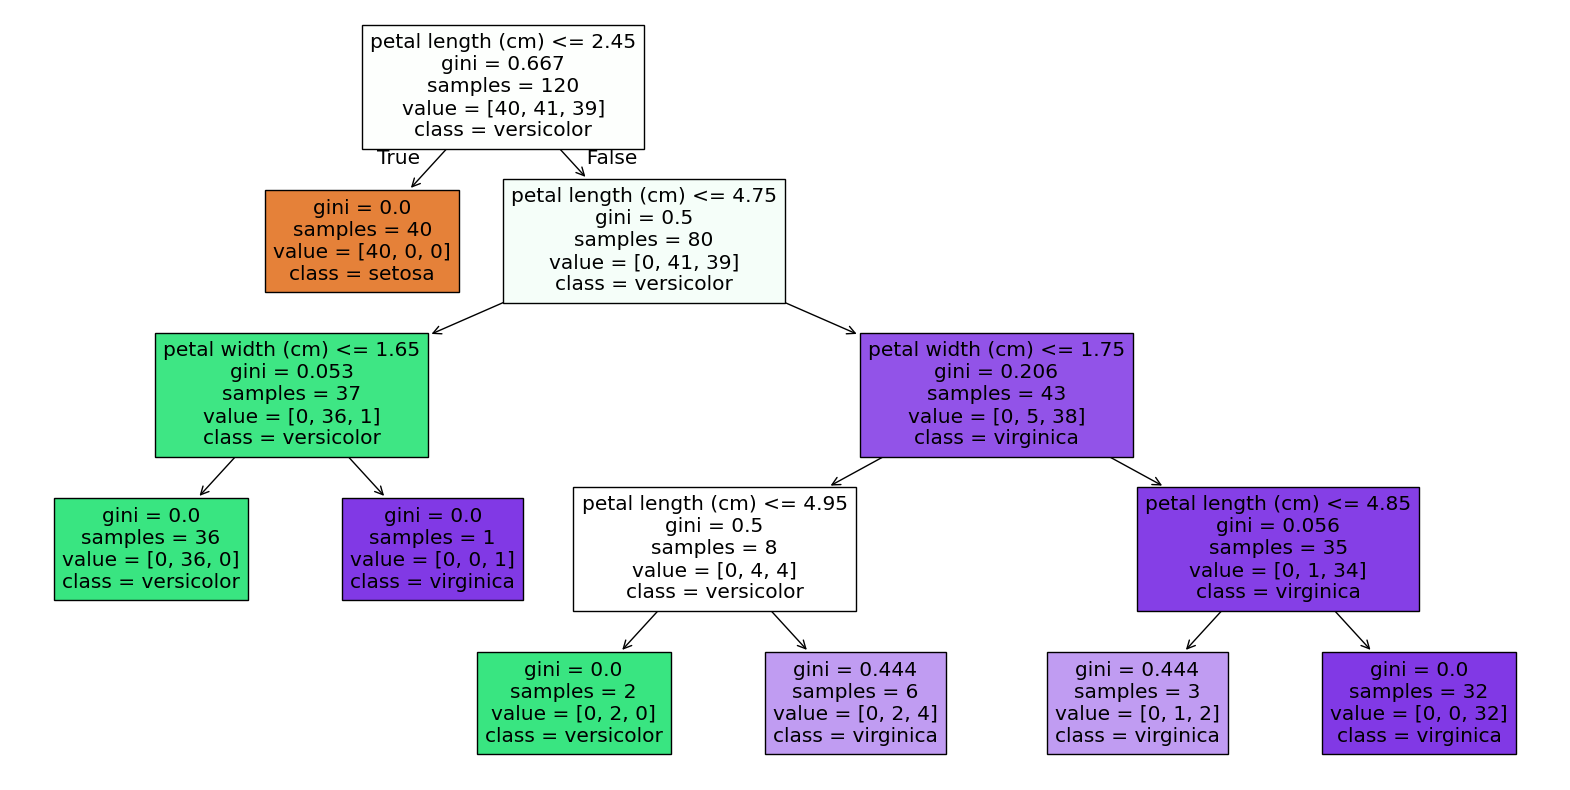

In [13]:
plt.figure(figsize=(20,10))
plot_tree(model_clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


In [14]:
importance = pd.DataFrame({
    "Feature": data.feature_names,
    "Importance": model_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance


,Feature,Importance
2,petal length (cm),0.936298
3,petal width (cm),0.063702
1,sepal width (cm),0.000000
0,sepal length (cm),0.000000


In [ ]:
import joblib
joblib.dump(model_clf, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\DecisionTreeclassifier_model.pkl")
# Save predictions to CSV
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Predictions\\DecisionTreeclassifier_Predictions.csv", index=False)
# End of Decision Tree classifier workflow code

Decision Tree Regression (California Housing)

In [15]:
from sklearn.datasets import fetch_california_housing

data_reg = fetch_california_housing(as_frame=True)
Xr = data_reg.data
yr = data_reg.target


In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=42
)

In [17]:
from sklearn.tree import DecisionTreeRegressor

model_reg = DecisionTreeRegressor(
    criterion="squared_error",   # default MSE
    max_depth=6,                 # avoid overfitting
    random_state=42
)


In [18]:
model_reg.fit(Xr_train, yr_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
yr_pred = model_reg.predict(Xr_test)

from sklearn.metrics import mean_squared_error, r2_score

rmse = (mean_squared_error(yr_test, yr_pred))**0.5
r2 = r2_score(yr_test, yr_pred)

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.6205125146233951
RMSE: 0.7051835278617654


In [20]:
importance_reg = pd.DataFrame({
    "Feature": Xr.columns,
    "Importance": model_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_reg


,Feature,Importance
0,MedInc,0.729888
5,AveOccup,0.137787
1,HouseAge,0.043518
2,AveRooms,0.034038
6,Latitude,0.030302
7,Longitude,0.016880
4,Population,0.004349
3,AveBedrms,0.003238


In [22]:
#Save model
joblib.dump(model_reg, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\DecisionTreeRegressor_model.pkl")
# Save predictions to CSV
pd.DataFrame({"Actual": yr_test, "Predicted": yr_pred}).to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Predictions\\DecisionTreeRegressor_Predictions.csv", index=False)
# End of Decision Tree Regressor workflow code